In [10]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import ndimage
import random
from scipy.optimize import leastsq
from scipy import ndimage
from scipy.optimize import least_squares
from func import *
from scipy import stats
from matplotlib.colors import LogNorm
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.weight'] = 'light'
import cmasher as cmr

In [2]:
hdu = fits.open('/Volumes/Seagate/HE0040-1105 Extended/HE0040-1105.extended_cube.fits')
qso_data = hdu[0].data
qso_error = hdu[1].data
qso_header = hdu[0].header
#print(qso_header)
wavestart = qso_header['CRVAL3']
wavint = qso_header['CD3_3']
wave = wavestart+np.arange(qso_data.shape[0])*wavint#. This is the same as the one below.
qso_data[np.isnan(qso_data)] = 0.0000001
qso_error[np.isnan(qso_error)] = 0.000001
(central_y,central_x) = (64,56)
print (central_x,central_y)

56 64


In [3]:
z =0.04196
k = 1+z
c = 300000

In [4]:
(xw,yw) = (64,57)
small_dat = qso_data[:,yw-2:yw+3,xw-2:xw+3]
small_err = qso_error[:,yw-2:yw+3,xw-2:xw+3]

In [5]:
c = 300000
z = 0.04196
(dat,err) = int_spec(small_dat,small_err)
central_vel = c*z

x = wave
y = dat
y_err = err

In [7]:
(popt1,pcov1) = leastsq(full_gauss_eline,x0=[0.7*amp_Hb,0.7*amp_OIII,central_vel,100,0.0,0.0,central_vel,0,0.0001,0.002],args = (x,y,y_err),maxfev=10000000)

model1 = full_gauss_eline(popt1,x,y,y_err)*(y_err)+y

#result2 = least_squares(full_gauss2_eline,bounds=(lower_bounds,upper_bounds),x0=[0.7*amp_Hb,0.7*amp_OIII,central_vel,100,0.3*amp_Hb,0.3*amp_OIII,central_vel - 100,100,0.0001,0.002],args = (x,y,y_err),max_nfev=10000000)
#popt2 = result2['x']
#model2 = full_gauss2_eline(popt2,x,y,y_err)*(y_err)+y

popt = popt1

print (popt1)
model = full_gauss_eline(popt,x,y,y_err)*(y_err)+y
core = Hb_O3_gauss(x,popt[0],popt[1],popt[2],popt[3]) + continuum(x,popt[8],popt[9])
wing = Hb_O3_gauss(x,popt[4],popt[5],popt[6],popt[7])+ continuum(x,popt[8],popt[9])

[ 4.09102121e-02  4.21612273e-01  1.23814083e+04  9.66321205e+01
  0.00000000e+00  0.00000000e+00  1.25880000e+04  0.00000000e+00
 -8.28571294e-03  4.91108362e-02]


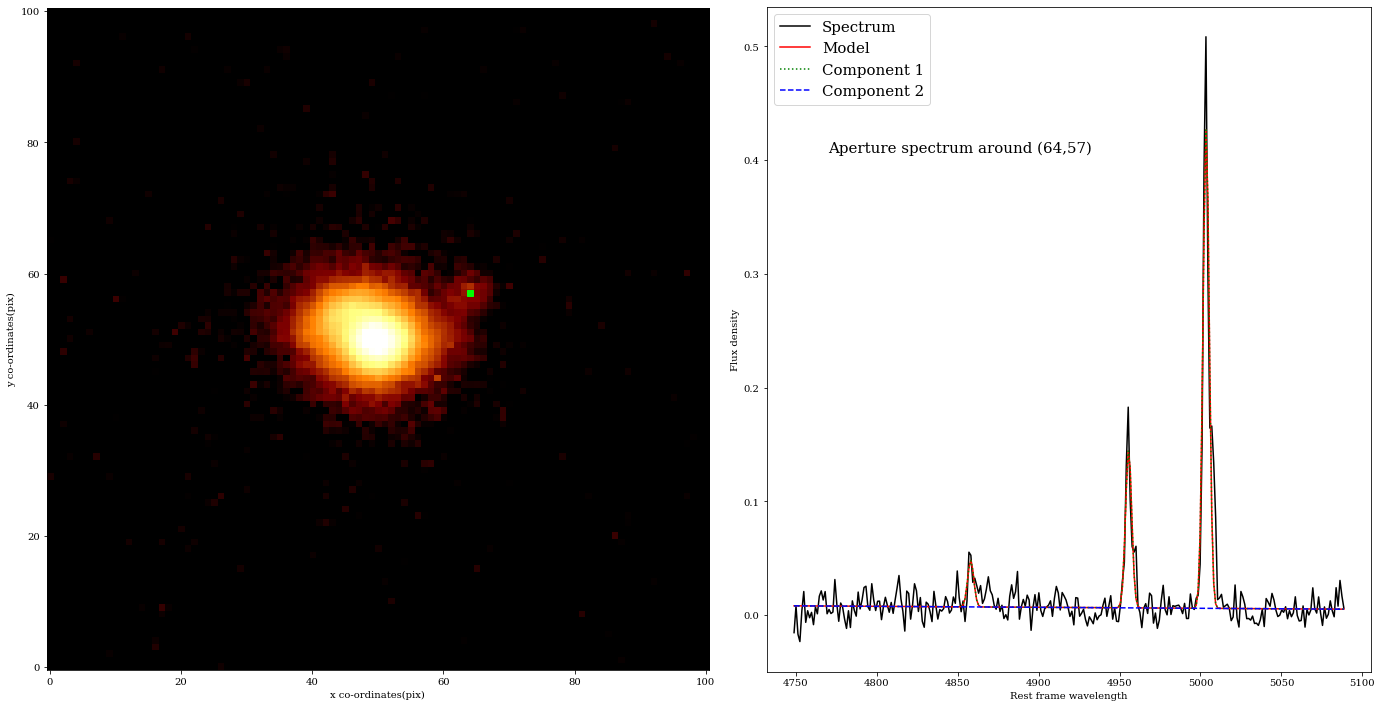

In [25]:
fig = plt.figure(figsize=(20,11))
ax1 = fig.add_axes([0.06, 0.1, 0.46, 0.84]) # main axes
ax2 = fig.add_axes([0.56, 0.1, 0.42, 0.84]) # main axes


pic_slice = qso_data[213,:,:]
pic_slice[pic_slice<1e-4] = 1e-15
ax1.imshow(pic_slice,origin='lower',interpolation='nearest',cmap='afmhot',norm=LogNorm(),vmin=0.003,vmax=0.9)
ax1.set_xlabel('x co-ordinates(pix)')
ax1.set_ylabel('y co-ordinates(pix)')

ax1.plot(xw,yw,'s',color='Lime')
ax2.plot(x/(1+z),dat,'k-',label='Spectrum')
ax2.plot(x/(1+z),model,'r-',label='Model')
ax2.plot(x/(1+z),core,'g:',label='Component 1')
ax2.plot(x/(1+z),wing,'b--',label='Component 2')
ax2.set_xlabel('Rest frame wavelength')
ax2.set_ylabel('Flux density')
ax2.text(4770,0.8*np.max(dat),'Aperture spectrum around (%s,%s)'%(xw,yw),fontsize=15)
ax2.legend(loc='upper left',fontsize=15)
fig.savefig('/Volumes/Seagate/HE0040-1105 Extended/Coadded spectrum (5 pixels) around (%s,%s)'%(xw,yw),overwrite=True)